## Data preparation

In [10]:
from pathlib import Path
from matplotlib import pyplot as plt

from DPS.image_transforms import transform_ops
from DPS.data_preparation import tensor_to_pil, get_datasets

In [11]:
#_, base_ds = load_data(n_test=4, transformation=base_transform, split_generator=generator)
#_, gaussian_ds = load_data(n_test=4, transformation=gaussian_blur, split_generator=generator)
#_, downscale_4x_ds = load_data(n_test=4, transformation=downscale_4x, split_generator=generator)
#_, downscale_16x_ds = load_data(n_test=4, transformation=downscale_16x, split_generator=generator)
#datasets = [base_ds, gaussian_ds, downscale_4x_ds, downscale_16x_ds]

In [15]:
datasets = {
    name: get_datasets(dataset=Path("/tmp/pml_example_pictures/"), n_test=1, transformation=op)[1] 
    for name, op in transform_ops.items()
}

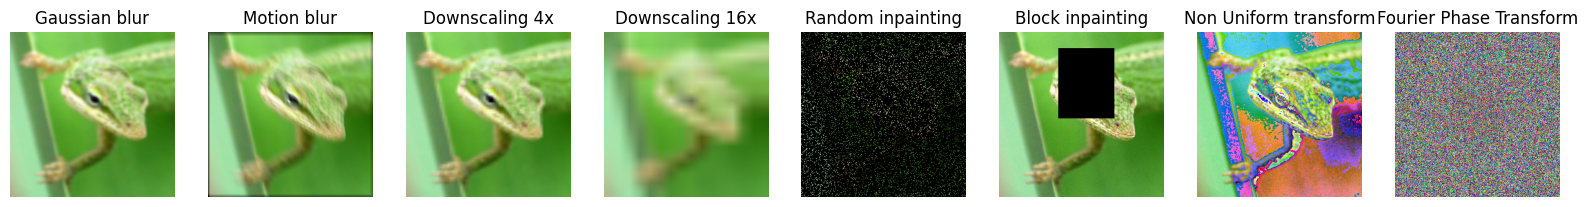

In [18]:
op_names = list(datasets.keys())
for images in zip(*datasets.values()):
    f, axarr = plt.subplots(1, len(images), figsize=(20, 20))
    for ax, (idx, img) in zip(axarr, enumerate(images)):
        img = img.clone()
        img = tensor_to_pil(img)
        ax.axis('off')
        ax.set_title(op_names[idx])
        ax.imshow(img)
    plt.show()